# Notebook for Analyzing the Results of Search Experiments

In [1]:
import json
import matplotlib.pyplot as plt
from alphaarc.task import Task


In [2]:

def plot_program_line_len_frequency(data): 
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=range(min(data), max(data) + 2), edgecolor='black', align='left')
    plt.title('Histogram of Given Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_program_lengths(successful_tasks):

    task_keys = [task["task"] for task in successful_tasks]
    tasks = [Task.from_json(f"../data/training/{x}.json") for x in task_keys]
    program_lines_len = [len(task.program_lines.split("\n")) for task in tasks]

    
    average_task_length = sum(program_lines_len) / len(program_lines_len)
    print(f"average task length solved: {average_task_length}")
    plot_program_line_len_frequency(program_lines_len)

def analyze_results(path): 
    with open(path) as f:
        data = json.load(f)
    total_tasks = len(data)
    successful_tasks = [t for t in data if t["success"]]
    failed_tasks = [t for t in data if not t["success"]]

    success_task_keys = [x["task"] for x in successful_tasks]
    print(f"tasks solved:{success_task_keys}")
    print(f"Total tasks: {total_tasks}")
    print(f"Successful tasks: {len(successful_tasks)}")
    print(f"Failed tasks: {len(failed_tasks)}")

    avg_success_time = (
        sum(t["time_sec"] for t in successful_tasks) / len(successful_tasks)
        if successful_tasks else 0
    )
    print(f"Average time for successful tasks: {avg_success_time:.2f} sec")
    plot_program_lengths(successful_tasks)






## Splint Results

tasks solved:['c8f0f002', 'ac0a08a4', 'ff805c23', 'c9e6f938', '6fa7a44f', '68b16354', '6150a2bd']
Total tasks: 89
Successful tasks: 7
Failed tasks: 82
Average time for successful tasks: 11.13 sec
average task length solved: 2.5714285714285716


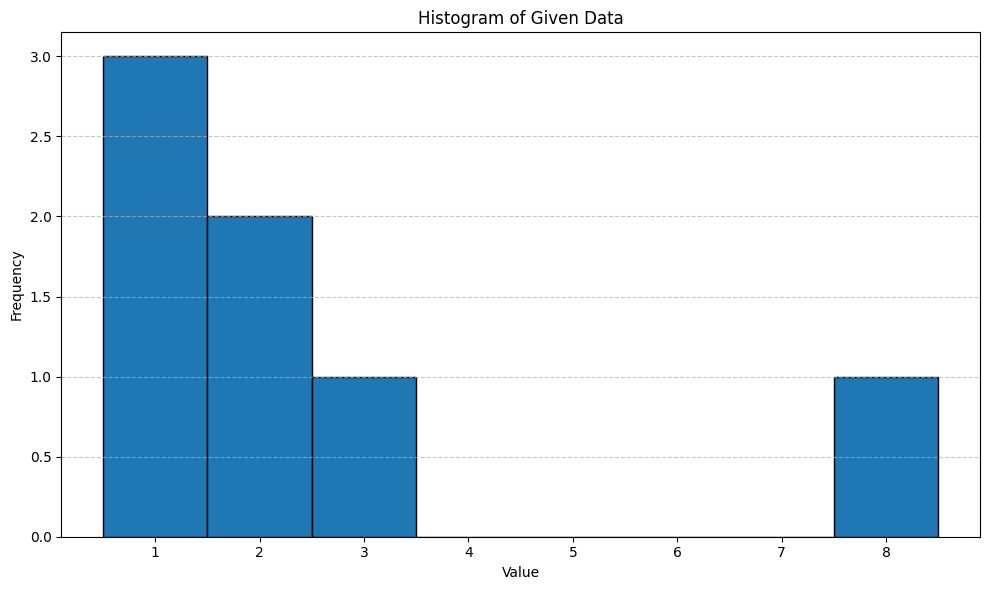

In [3]:
splint_results_path = '../results/splintmcts/experiment_results.json'
analyze_results(splint_results_path)


## TG MCTS Results

In [4]:
tg_mcts_results_path = '../results/tgmcts/experiment_results.json'
analyze_results(tg_mcts_results_path)

tasks solved:[]
Total tasks: 1
Successful tasks: 0
Failed tasks: 1
Average time for successful tasks: 0.00 sec


ZeroDivisionError: division by zero